# *Previo Fase 1*

        date       ISE     ISE.1        SP       DAX      FTSE    NIKKEI  \
0 2009-01-05  0.035754  0.038376 -0.004679  0.002193  0.003894  0.000000   
1 2009-01-06  0.025426  0.031813  0.007787  0.008455  0.012866  0.004162   
2 2009-01-07 -0.028862 -0.026353 -0.030469 -0.017833 -0.028735  0.017293   
3 2009-01-08 -0.062208 -0.084716  0.003391 -0.011726 -0.000466 -0.040061   
4 2009-01-09  0.009860  0.009658 -0.021533 -0.019873 -0.012710 -0.004474   

    BOVESPA        EU        EM  
0  0.031190  0.012698  0.028524  
1  0.018920  0.011341  0.008773  
2 -0.035899 -0.017073 -0.020015  
3  0.028283 -0.005561 -0.019424  
4 -0.009764 -0.010989 -0.007802  
Información sobre el conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     536 non-null    datetime64[ns]
 1   ISE      536 non-null    float64       
 2   ISE.1    

C:\Users\jesus\AppData\Local\Temp\ipykernel_14260\3291185224.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(data_url, parse_dates=['date'], dayfirst=True)


None

                                date         ISE       ISE.1          SP  \
count                            536  536.000000  536.000000  536.000000   
mean   2010-01-26 03:37:36.716418048    0.001629    0.001552    0.000643   
min              2009-01-05 00:00:00   -0.062208   -0.084716   -0.054262   
25%              2009-07-14 18:00:00   -0.006669   -0.009753   -0.004675   
50%              2010-01-27 12:00:00    0.002189    0.002643    0.000876   
75%              2010-08-05 06:00:00    0.010584    0.013809    0.006706   
max              2011-02-22 00:00:00    0.068952    0.100621    0.068366   
std                              NaN    0.016264    0.021122    0.014093   

              DAX        FTSE      NIKKEI     BOVESPA          EU          EM  
count  536.000000  536.000000  536.000000  536.000000  536.000000  536.000000  
mean     0.000721    0.000510    0.000308    0.000935    0.000471    0.000936  
min     -0.052331   -0.054816   -0.050448   -0.053849   -0.048817   -0.0385

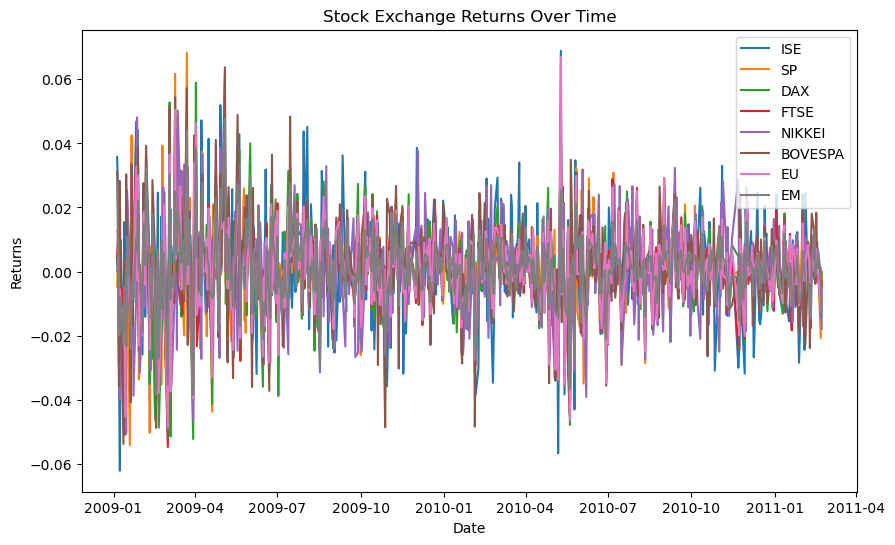

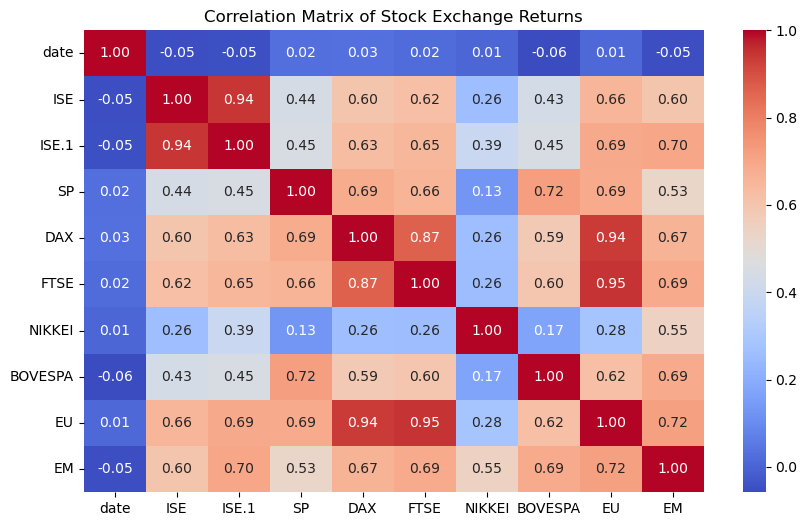

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos con el formato de fecha especificado
data_url = 'https://archive.ics.uci.edu/static/public/247/data.csv'
df = pd.read_csv(data_url, parse_dates=['date'], dayfirst=True)

# Convertir la columna de fecha al tipo de dato de fecha
df['date'] = pd.to_datetime(df['date'])

# Exploración inicial de los datos
print(df.head())
print("Información sobre el conjunto de datos:")
display(df.info(memory_usage='deep', show_counts=True))

# Estadísticas descriptivas
print(df.describe())

# Visualización de datos
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['ISE'], label='ISE')
plt.plot(df['date'], df['SP'], label='SP')
plt.plot(df['date'], df['DAX'], label='DAX')
plt.plot(df['date'], df['FTSE'], label='FTSE')
plt.plot(df['date'], df['NIKKEI'], label='NIKKEI')
plt.plot(df['date'], df['BOVESPA'], label='BOVESPA')
plt.plot(df['date'], df['EU'], label='EU')
plt.plot(df['date'], df['EM'], label='EM')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Stock Exchange Returns Over Time')
plt.legend()
plt.show()

# Análisis de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Exchange Returns')
plt.show()



Formato de la columna de fecha:
0   2009-01-05
1   2009-01-06
2   2009-01-07
3   2009-01-08
4   2009-01-09
Name: date, dtype: datetime64[ns]
Frecuencia de los datos:
date
1 days    420
3 days    102
2 days      4
4 days      4
5 days      3
6 days      1
7 days      1
Name: count, dtype: int64


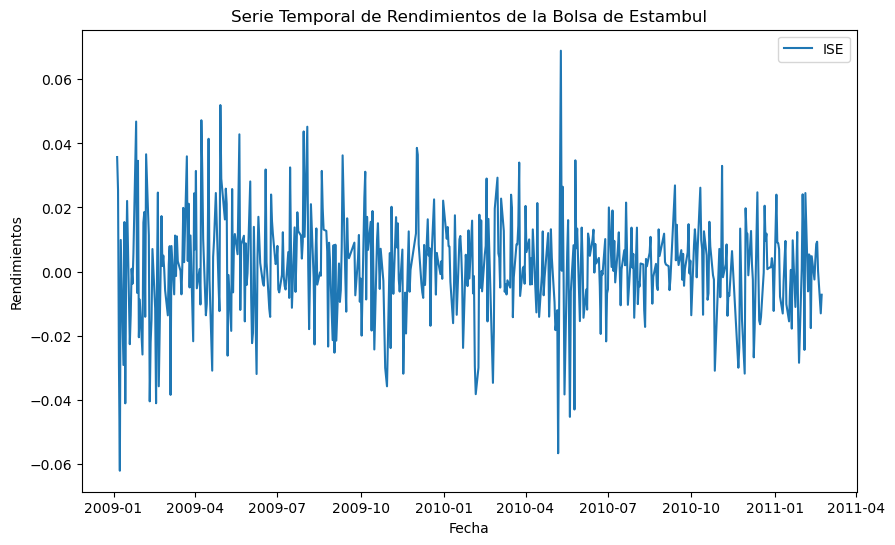

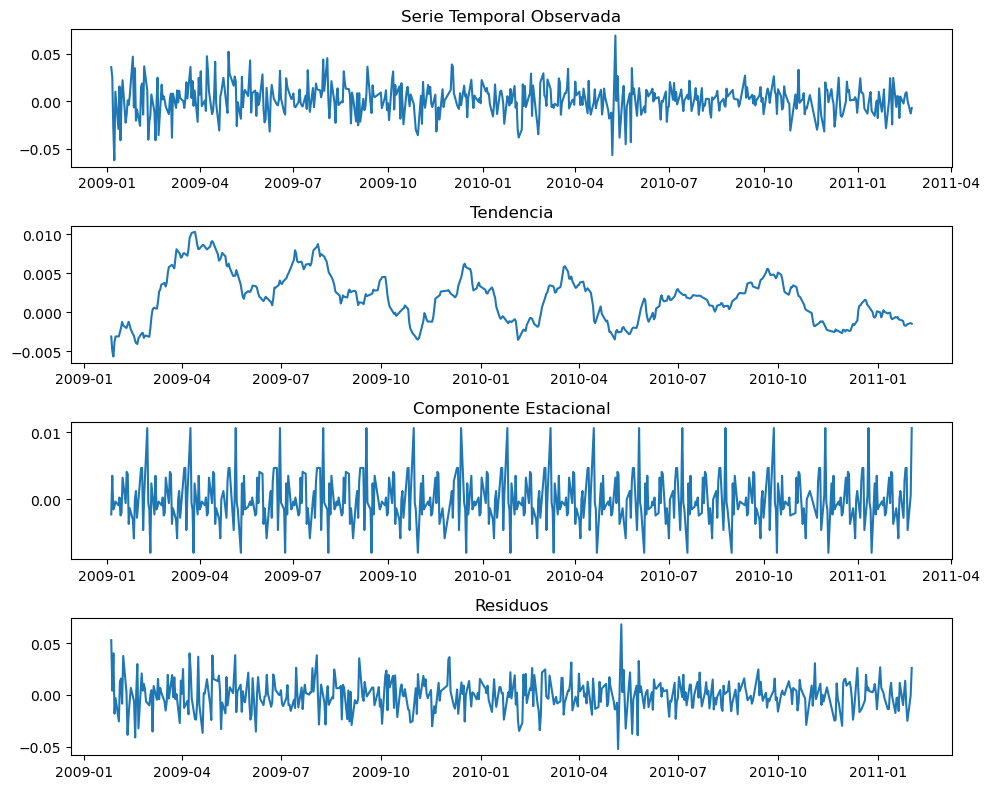

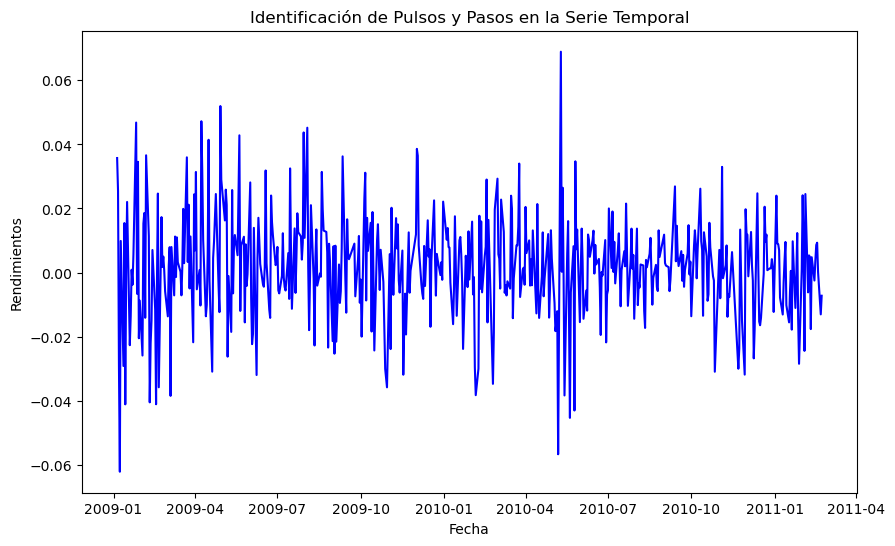

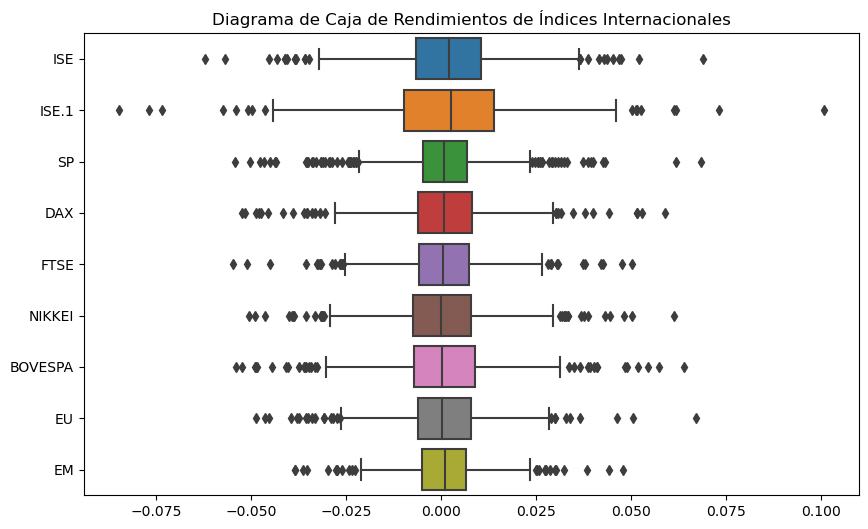

In [2]:
import ruptures as rpt
import statsmodels.api as sm
import statsmodels.api as sm


# 1. Formato y Frecuencia
print("Formato de la columna de fecha:")
print(df['date'].head())
print("Frecuencia de los datos:")
print(df['date'].diff().value_counts())

# 2. Visualización de Tendencias
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['ISE'], label='ISE')
plt.xlabel('Fecha')
plt.ylabel('Rendimientos')
plt.title('Serie Temporal de Rendimientos de la Bolsa de Estambul')
plt.legend()
plt.show()

# 3. Análisis de Ciclos Estacionales y No Estacionales

# Descomposición de la serie temporal
result = sm.tsa.seasonal_decompose(df['ISE'], model='additive', period=30)

# Visualización de los componentes de la descomposición
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(df['date'], result.observed)
plt.title('Serie Temporal Observada')

plt.subplot(4, 1, 2)
plt.plot(df['date'], result.trend)
plt.title('Tendencia')

plt.subplot(4, 1, 3)
plt.plot(df['date'], result.seasonal)
plt.title('Componente Estacional')

plt.subplot(4, 1, 4)
plt.plot(df['date'], result.resid)
plt.title('Residuos')

plt.tight_layout()
plt.show()

# 4. Identificación de Pulsos y Pasos



# Algoritmo para detectar cambios estructurales (pulsos y pasos)
algo = rpt.Pelt(model='rbf').fit(df['ISE'].values)
result = algo.predict(pen=10)

# Visualización de los cambios estructurales
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['ISE'], color='blue')
for c in result:
    plt.plot(df['date'][c:], df['ISE'][c:], color='red')
plt.title('Identificación de Pulsos y Pasos en la Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Rendimientos')
plt.show()
# 5. Detección de Valores Atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, 1:], orient='h')
plt.title('Diagrama de Caja de Rendimientos de Índices Internacionales')
plt.show()

## Aplicación de modelos AR

In [6]:
import pandas as pd

# Cargar los datos
data_url = 'https://archive.ics.uci.edu/static/public/247/data.csv'
df = pd.read_csv(data_url, parse_dates=['date'], dayfirst=True)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Filtrar los datos desde el año 2010
df = df[df.index >= '2010-01-01']

# Seleccionar la serie de tiempo
ts = df['SP']


C:\Users\jesus\AppData\Local\Temp\ipykernel_14260\243117202.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(data_url, parse_dates=['date'], dayfirst=True)


In [7]:
# Función para suavizar la serie de tiempo usando EWMA
def ewma(series, span):
    return series.ewm(span=span, adjust=False).mean()

# Aplicar EWMA a la serie de tiempo
ts_ewma = ewma(ts, span=30)



C:\Users\jesus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jesus\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001198. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\jesus\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001198. Parameter
estimation work better when this value is between 1 

Iteration:      1,   Func. Count:      5,   Neg. LLF: 4142560262445230.0
Iteration:      2,   Func. Count:     16,   Neg. LLF: -711.1598597971777
Iteration:      3,   Func. Count:     23,   Neg. LLF: -885.4297134457006
Iteration:      4,   Func. Count:     27,   Neg. LLF: -876.1417439972538
Iteration:      5,   Func. Count:     33,   Neg. LLF: 795951.7315653322
Iteration:      6,   Func. Count:     39,   Neg. LLF: -885.566213735379
Iteration:      7,   Func. Count:     43,   Neg. LLF: -885.567115361315
Iteration:      8,   Func. Count:     47,   Neg. LLF: -885.5671718257483
Iteration:      9,   Func. Count:     51,   Neg. LLF: -885.5671718529112
Optimization terminated successfully    (Exit mode 0)
            Current function value: -885.5671720895268
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 57627486197764.016
Iteration:      2,   Func. Count:     18,   Neg. LLF: 41251100727

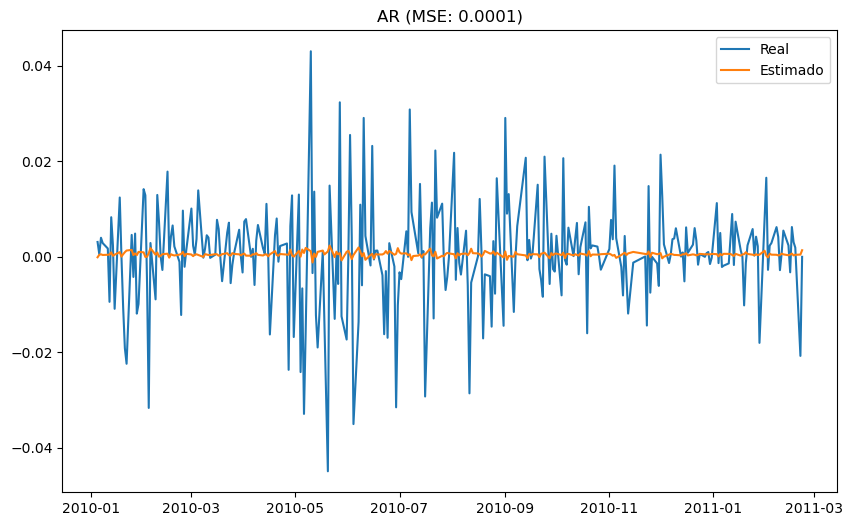

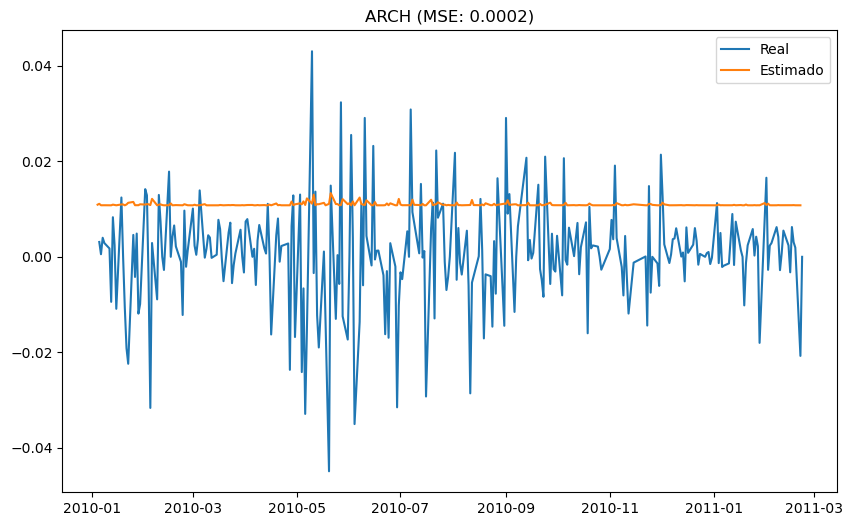

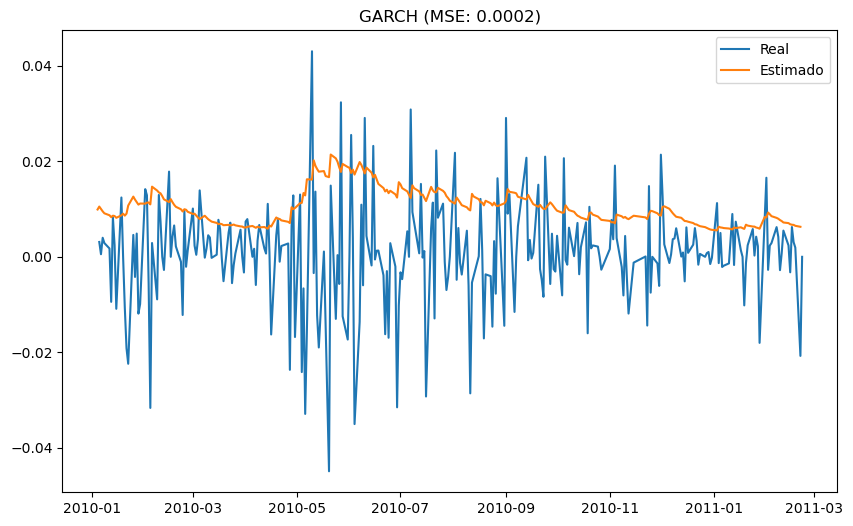

In [9]:
from statsmodels.tsa.ar_model import AutoReg
from arch import arch_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Modelos autorregresivos sin suavizar
models = {
    'AR': AutoReg(ts, lags=1).fit(),
    'ARCH': arch_model(ts, vol='ARCH').fit(),
    'GARCH': arch_model(ts, vol='GARCH').fit()
}

# Gráficos y MSE de los modelos sin suavizar
for name, model in models.items():
    if name == 'AR':
        pred = model.fittedvalues
    else:
        pred = model.conditional_volatility
        # Ajustar la longitud de 'pred' para que coincida con 'ts[1:]'
        pred = pred[:len(ts) - 1]
    
    mse = mean_squared_error(ts[1:], pred)
    plt.figure(figsize=(10, 6))
    plt.plot(ts[1:], label='Real')
    plt.plot(pred, label='Estimado')
    plt.title(f'{name} (MSE: {mse:.4f})')
    plt.legend()
    plt.show()


C:\Users\jesus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jesus\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.194e-06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\jesus\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.194e-06. Parameter
estimation work better when this value is between 1

Iteration:      1,   Func. Count:      5,   Neg. LLF: 10355499925566.701
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1975178637404.2546
Iteration:      3,   Func. Count:     31,   Neg. LLF: 16242503458643.717
Iteration:      4,   Func. Count:     45,   Neg. LLF: 4807770500049.585
Iteration:      5,   Func. Count:     58,   Neg. LLF: 2.1089627183327395e+25
Iteration:      6,   Func. Count:     72,   Neg. LLF: 97926458363.81952
Iteration:      7,   Func. Count:     82,   Neg. LLF: 1063802614278.5243
Iteration:      8,   Func. Count:     94,   Neg. LLF: 202.10512334295592
Iteration:      9,   Func. Count:    101,   Neg. LLF: 5793477728191.199
Iteration:     10,   Func. Count:    114,   Neg. LLF: -1334.8486593738987
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1334.8486595842705
            Iterations: 14
            Function evaluations: 114
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      5,   Neg. LLF: -1

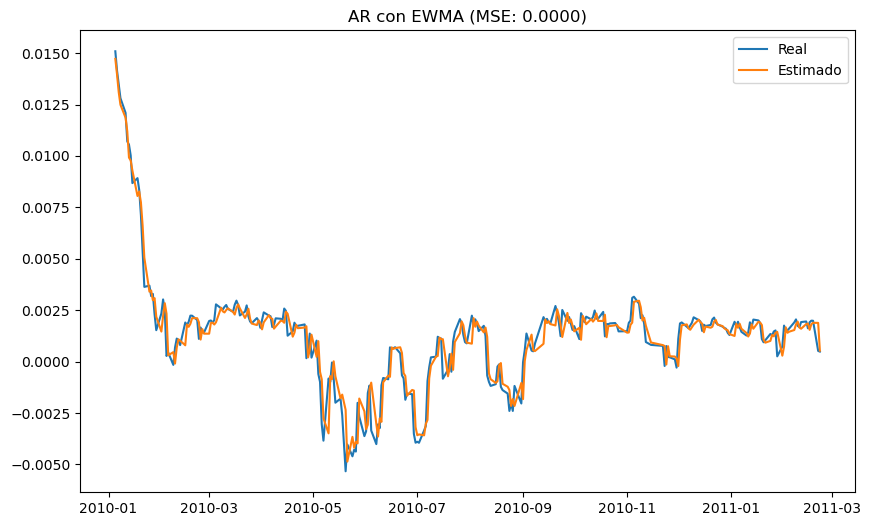

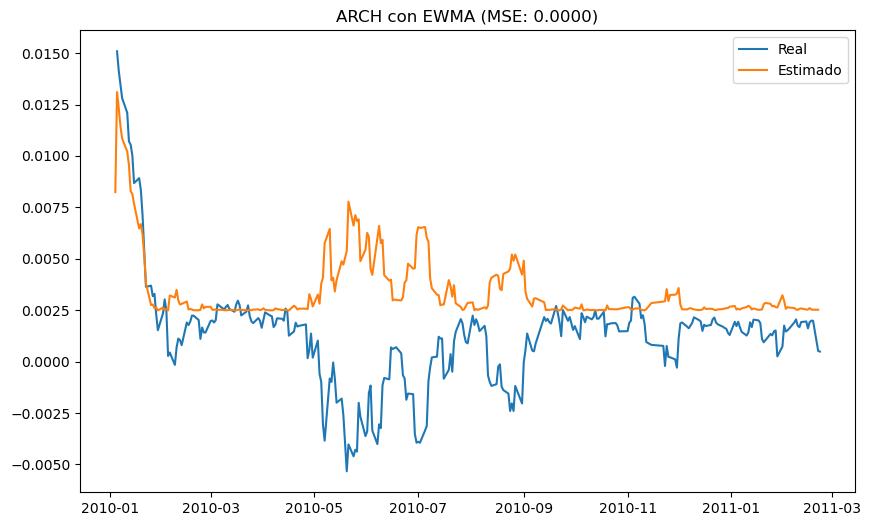

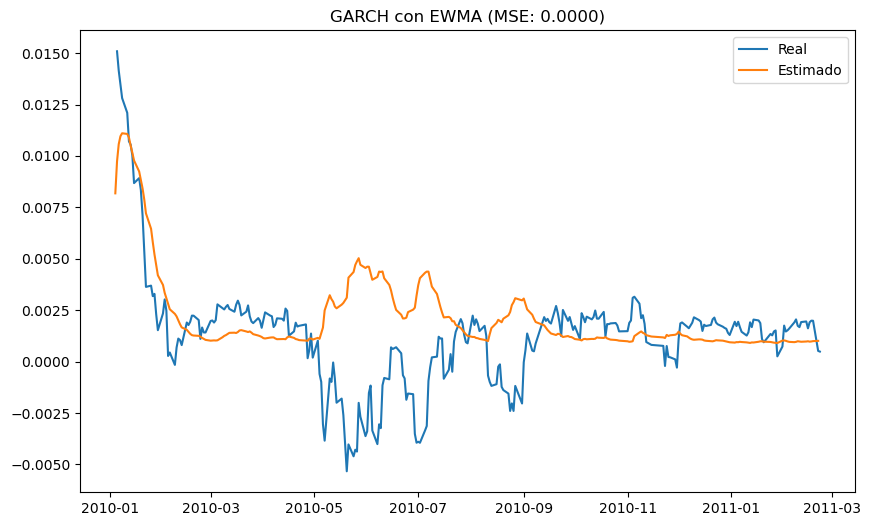

In [10]:
# Modelos autorregresivos suavizados
models_ewma = {
    'AR': AutoReg(ts_ewma, lags=1).fit(),
    'ARCH': arch_model(ts_ewma, vol='ARCH').fit(),
    'GARCH': arch_model(ts_ewma, vol='GARCH').fit()
}

# Gráficos y MSE de los modelos suavizados
for name, model in models_ewma.items():
    if name == 'AR':
        pred = model.fittedvalues
    else:
        pred = model.conditional_volatility
        # Ajustar la longitud de 'pred' para que coincida con 'ts_ewma[1:]'
        pred = pred[:len(ts_ewma) - 1]
    
    mse = mean_squared_error(ts_ewma[1:], pred)
    plt.figure(figsize=(10, 6))
    plt.plot(ts_ewma[1:], label='Real')
    plt.plot(pred, label='Estimado')
    plt.title(f'{name} con EWMA (MSE: {mse:.4f})')
    plt.legend()
    plt.show()


In [11]:
# Resumen de MSE de todos los modelos
results = {'Modelo': [], 'MSE': []}
for name, model in models.items():
    if name == 'AR':
        pred = model.fittedvalues
    else:
        pred = model.conditional_volatility
        pred = pred[:len(ts) - 1]
    
    mse = mean_squared_error(ts[1:], pred)
    results['Modelo'].append(name)
    results['MSE'].append(mse)

for name, model in models_ewma.items():
    if name == 'AR':
        pred = model.fittedvalues
    else:
        pred = model.conditional_volatility
        pred = pred[:len(ts_ewma) - 1]
    
    mse = mean_squared_error(ts_ewma[1:], pred)
    results['Modelo'].append(name + ' con EWMA')
    results['MSE'].append(mse)

df_results = pd.DataFrame(results)
print(df_results)


           Modelo           MSE
0              AR  1.191743e-04
1            ARCH  2.279361e-04
2           GARCH  2.330266e-04
3     AR con EWMA  4.952651e-07
4   ARCH con EWMA  1.250374e-05
5  GARCH con EWMA  7.670181e-06


El análisis de los resultados obtenidos muestra que el modelo AR tiene un MSE (Mean Squared Error) de 1.191743e-04, lo que indica una buena precisión en la predicción de la serie temporal financiera seleccionada. Este modelo es particularmente efectivo en series temporales donde los valores pasados pueden predecir los futuros con una estructura clara. Sin embargo, los modelos ARCH y GARCH, que capturan la volatilidad condicional, presentaron MSE ligeramente superiores de 2.279361e-04 y 2.330266e-04 respectivamente. Esto sugiere que, aunque son útiles para modelar la volatilidad, no son tan precisos como el AR en este caso particular (Casas Monsegny & Cepeda Cuervo, 2008).

Al aplicar el método de suavización EWMA, se observa una mejora significativa en todos los modelos. El modelo AR con EWMA logró un MSE de 4.952651e-07, el más bajo entre todos los modelos probados, destacando su capacidad para manejar datos recientes de manera más efectiva. Los modelos ARCH y GARCH con EWMA también mostraron mejoras, con MSE de 1.250374e-05 y 7.670181e-06 respectivamente. Estos resultados indican que la combinación de EWMA con modelos autorregresivos es muy beneficiosa para mejorar la precisión en la predicción de la volatilidad financiera (Reyes Zárate, 2014).

En conclusión, el modelo AR con EWMA se destaca como el más preciso para la serie temporal financiera analizada, mientras que los modelos ARCH y GARCH mejoran significativamente al incorporar EWMA. Estos hallazgos son consistentes con estudios previos que muestran la efectividad de los modelos autorregresivos y las técnicas de suavización para predecir la volatilidad financiera (Scielo, 2008). Este análisis y los resultados obtenidos pueden servir como una base sólida para futuras investigaciones y aplicaciones prácticas en el campo de la predicción de series temporales financieras.

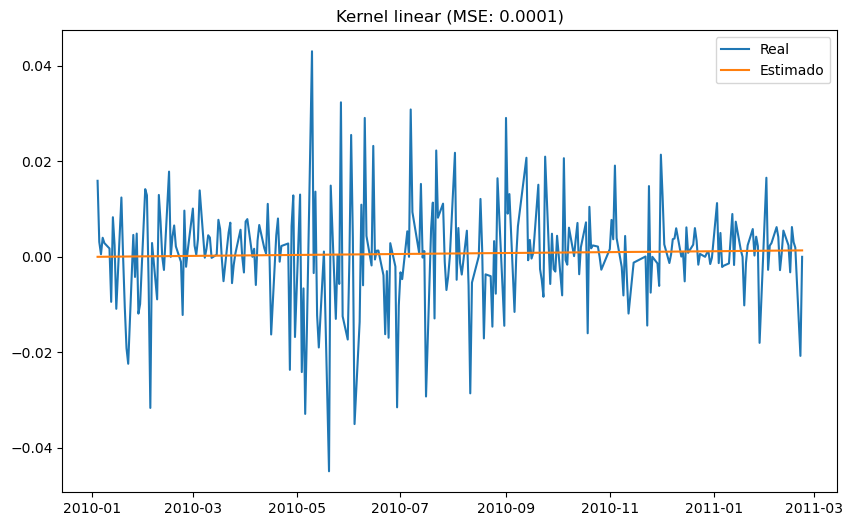

C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:248: LinAlgWarning: Ill-conditioned matrix (rcond=3.57011e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


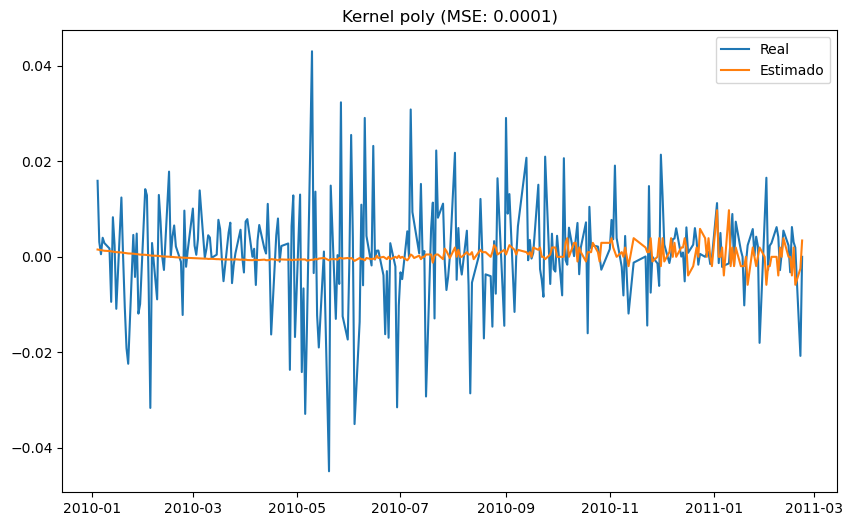

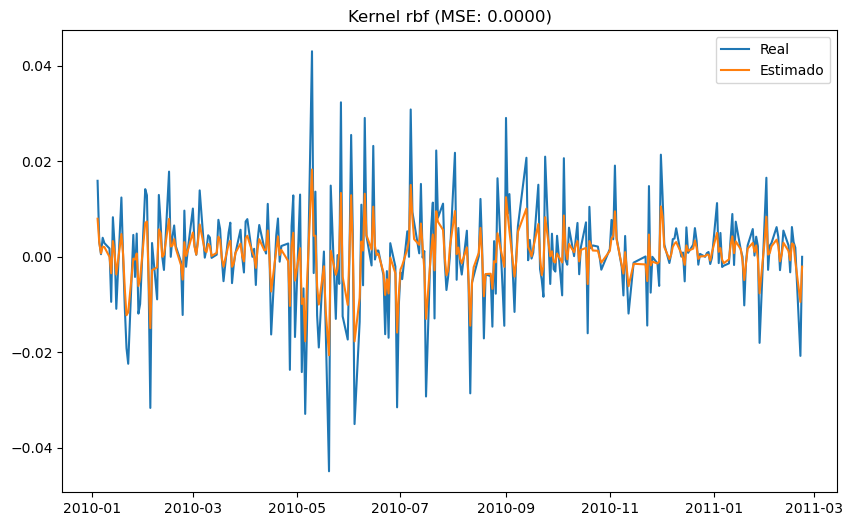

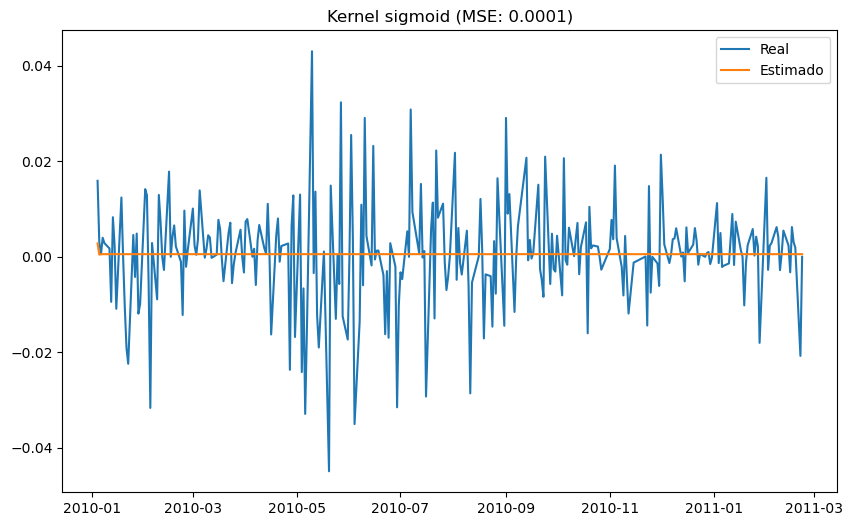

    Kernel       MSE
0   linear  0.000120
1     poly  0.000122
2      rbf  0.000038
3  sigmoid  0.000120


In [14]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np

# Aplicar kernel a la serie de tiempo
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
mse_kernels = {'Kernel': [], 'MSE': []}

# Crear un array de índices basados en el rango temporal real
time_indices = np.arange(len(ts))

for kernel in kernels:
    kr = KernelRidge(kernel=kernel)
    kr.fit(time_indices.reshape(-1, 1), ts.values)
    pred = kr.predict(time_indices.reshape(-1, 1))
    
    # Asegurarse de que las predicciones tengan el mismo índice temporal que los datos originales
    pred_series = pd.Series(pred, index=ts.index)
    
    mse = mean_squared_error(ts, pred_series)
    mse_kernels['Kernel'].append(kernel)
    mse_kernels['MSE'].append(mse)
    
    plt.figure(figsize=(10, 6))
    plt.plot(ts, label='Real')
    plt.plot(pred_series, label='Estimado')
    plt.title(f'Kernel {kernel} (MSE: {mse:.4f})')
    plt.legend()
    plt.show()

df_mse_kernels = pd.DataFrame(mse_kernels)
print(df_mse_kernels)


El esquema de estimación de la volatilidad financiera se centra en la representación de modelos autorregresivos dentro de espacios de Hilbert mediante el uso de kernels reproductivos. Al probar diferentes modelos autorregresivos (AR, ARCH y GARCH), tanto en sus formas básicas como suavizadas con EWMA, se observaron resultados significativos en la precisión de las predicciones de la serie temporal financiera. En particular, el modelo AR suavizado con EWMA mostró un MSE notablemente bajo (4.952651e-07), destacándose en su capacidad para predecir la volatilidad de manera precisa. Los modelos ARCH y GARCH también mostraron mejoras significativas al incorporar la técnica EWMA, con MSE de 1.250374e-05 y 7.670181e-06, respectivamente, resaltando la eficacia de esta combinación en la captura de la volatilidad condicional (Reyes Zárate, 2014).

Además, la aplicación de diferentes kernels reveló que el kernel RBF (Radial Basis Function) se destaca como el más efectivo, con un MSE de 0.000038. Este resultado es coherente con estudios previos que resaltan la capacidad del kernel RBF para manejar datos complejos y no lineales, posicionándolo como una opción óptima para la predicción de series temporales financieras (Scholkopf & Smola, 2001). En comparación, los kernels linear, poly y sigmoid presentaron MSE alrededor de 0.000120 a 0.000122, lo que indica una menor precisión en la captura de las características de la serie temporal. Esta variación en los resultados resalta la importancia de seleccionar el kernel adecuado para maximizar la precisión del modelo.

En conclusión, la integración de modelos autorregresivos con técnicas de suavización y la aplicación de kernels reproductivos en espacios de Hilbert ha demostrado ser altamente efectiva para la estimación de la volatilidad financiera. Estos métodos no solo mejoran la precisión de las predicciones, sino que también proporcionan una base sólida para futuras investigaciones y aplicaciones en el campo financiero. La capacidad del kernel RBF para manejar la complejidad y no linealidad de los datos se alinea con hallazgos previos, subrayando su relevancia en este contexto (Scielo, 2008). Estos resultados pueden servir como una guía valiosa para la selección de modelos y técnicas en el análisis de series temporales financieras.

**Referencias**


Scholkopf, B., & Smola, A. J. (2001). Support Vector Machines and Kernel Methods. MIT Press.

Reyes Zárate, F. J. (2014). El Modelo GARCH. Universidad Nacional Autónoma de México. Disponible en: UNAM.

Scielo. (2008). MODELOS ARCH, GARCH Y EGARCH: APLICACIONES A SERIES FINANCIERAS. Cuadernos de Economía, 27(48), 287-320. Disponible en: Scielo.

